<a href="https://colab.research.google.com/github/Sazahiba/AssignmentQ2/blob/main/Ionosphere.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/DL Data Sets/ionosphere_data.csv")
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


In [4]:
df1 =df['label']
df1.value_counts()

g    225
b    126
Name: label, dtype: int64

In [5]:
df.sample(3)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
72,1,0,0.96087,0.08620,0.96760,0.19279,0.96026,0.27451,0.98044,0.35052,0.92867,0.46281,0.86265,0.52517,0.82820,0.58794,0.73242,0.69065,0.69003,0.7314,0.54473,0.68820,0.48339,0.76197,0.40615,0.74689,0.33401,0.83796,0.24944,0.86061,0.13756,0.86835,0.09048,0.86285,g
203,1,0,1.00000,0.09091,0.95455,-0.09091,0.77273,0.00000,1.00000,0.00000,0.95455,0.00000,1.00000,0.04545,0.90909,-0.04545,1.00000,0.00000,1.00000,0.0000,0.86364,0.09091,0.77273,0.09091,0.90909,0.04545,0.91541,0.02897,0.95455,0.09091,0.86364,-0.09091,0.86364,0.04545,g
246,1,0,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,1.00000,1.00000,0.55172,0.00000,0.00000,0.00000,0.0000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,b


In [6]:
df.drop_duplicates()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34,label
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,0.59755,-0.44945,0.60536,-0.38223,0.84356,-0.38542,0.58212,-0.32192,0.56971,-0.29674,0.36946,-0.47357,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,0.34432,-0.69707,-0.51685,-0.97515,0.05499,-0.62237,0.33109,-1.00000,-0.13151,-0.45300,-0.18056,-0.35734,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,0.85443,0.00827,0.54591,0.00299,0.83775,-0.13644,0.75535,-0.08540,0.70887,-0.27502,0.43385,-0.12062,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,-1.00000,0.14516,0.54094,-0.39330,-1.00000,-0.54467,-0.69975,1.00000,0.00000,0.00000,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,0.56409,-0.00712,0.34395,-0.27457,0.52940,-0.21780,0.45107,-0.17813,0.05982,-0.35575,0.02309,-0.52879,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,1,0,0.83508,0.08298,0.73739,-0.14706,0.84349,-0.05567,0.90441,-0.04622,0.89391,0.13130,0.81197,0.06723,0.79307,-0.08929,1.00000,-0.02101,0.96639,0.06618,0.87605,0.01155,0.77521,0.06618,0.95378,-0.04202,0.83479,0.00123,1.00000,0.12815,0.86660,-0.10714,0.90546,-0.04307,g
347,1,0,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,0.94171,0.07330,0.94625,-0.01326,0.97173,0.00140,0.94834,0.06038,0.92670,0.08412,0.93124,0.10087,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712,g
348,1,0,0.94701,-0.00034,0.93207,-0.03227,0.95177,-0.03431,0.95584,0.02446,0.94124,0.01766,0.92595,0.04688,0.93954,-0.01461,0.94837,0.02004,0.93784,0.01393,0.91406,0.07677,0.89470,0.06148,0.93988,0.03193,0.92489,0.02542,0.92120,0.02242,0.92459,0.00442,0.92697,-0.00577,g
349,1,0,0.90608,-0.01657,0.98122,-0.01989,0.95691,-0.03646,0.85746,0.00110,0.89724,-0.03315,0.89061,-0.01436,0.90608,-0.04530,0.91381,-0.00884,0.80773,-0.12928,0.88729,0.01215,0.92155,-0.02320,0.91050,-0.02099,0.89147,-0.07760,0.82983,-0.17238,0.96022,-0.03757,0.87403,-0.16243,g


In [7]:
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16,feature17,feature18,feature19,feature20,feature21,feature22,feature23,feature24,feature25,feature26,feature27,feature28,feature29,feature30,feature31,feature32,feature33,feature34
count,351.000000,351.0,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,0.891738,0.0,0.641342,0.044372,0.601068,0.115889,0.550095,0.119360,0.511848,0.181345,0.476183,0.155040,0.400801,0.093414,0.344159,0.071132,0.381949,-0.003617,0.359390,-0.024025,0.336695,0.008296,0.362475,-0.057406,0.396135,-0.071187,0.541641,-0.069538,0.378445,-0.027907,0.352514,-0.003794,0.349364,0.014480
std,0.311155,0.0,0.497708,0.441435,0.519862,0.460810,0.492654,0.520750,0.507066,0.483851,0.563496,0.494817,0.622186,0.494873,0.652828,0.458371,0.618020,0.496762,0.626267,0.519076,0.609828,0.518166,0.603767,0.527456,0.578451,0.508495,0.516205,0.550025,0.575886,0.507974,0.571483,0.513574,0.522663,0.468337
min,0.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,1.000000,0.0,0.472135,-0.064735,0.412660,-0.024795,0.211310,-0.054840,0.087110,-0.048075,0.021120,-0.065265,0.000000,-0.073725,0.000000,-0.081705,0.000000,-0.225690,0.000000,-0.234670,0.000000,-0.243870,0.000000,-0.366885,0.000000,-0.332390,0.286435,-0.443165,0.000000,-0.236885,0.000000,-0.242595,0.000000,-0.165350
50%,1.000000,0.0,0.871110,0.016310,0.809200,0.022800,0.728730,0.014710,0.684210,0.018290,0.667980,0.028250,0.644070,0.030270,0.601940,0.000000,0.590910,0.000000,0.576190,0.000000,0.499090,0.000000,0.531760,0.000000,0.553890,-0.015050,0.708240,-0.017690,0.496640,0.000000,0.442770,0.000000,0.409560,0.000000
75%,1.000000,0.0,1.000000,0.194185,1.000000,0.334655,0.969240,0.445675,0.953240,0.534195,0.957895,0.482375,0.955505,0.374860,0.919330,0.308975,0.935705,0.195285,0.899265,0.134370,0.894865,0.188760,0.911235,0.164630,0.905240,0.156765,0.999945,0.153535,0.883465,0.154075,0.857620,0.200120,0.813765,0.171660
max,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
data=df.iloc[:,:-1]
label=df.iloc[:,-1]

In [9]:
label = df["label"].map({'g':1,'b':0})

In [10]:
X_train=data.sample(frac=0.6,random_state=1)
X_test=data.sample(frac=0.4,random_state=1)
y_train=label.sample(frac=0.6,random_state=1)
y_test=label.sample(frac=0.4,random_state=1)

In [11]:
X_train=np.asarray(X_train).astype("float32")
X_test=np.asarray(X_test).astype("float32")

In [12]:
from keras import models, layers , optimizers ,regularizers,losses
network=models.Sequential()
network.add(layers.Dense(16,activation="relu",input_shape=(X_train.shape[1],)))
#network.add(layers.Dense(8,kernel_regularizer=regularizers.l2(0.0001),activation="relu"))
network.add(layers.Dense(1,activation="sigmoid"))
network.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=["accuracy"])

In [13]:
network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 577
Trainable params: 577
Non-trainable params: 0
_________________________________________________________________


In [14]:
history = network.fit(X_train,y_train,epochs=50,batch_size=1,verbose=1)

Epoch 1/50
211/211 [==============================] - 1s 1ms/step - loss: 0.6557 - accuracy: 0.6459
Epoch 2/50
211/211 [==============================] - 0s 1ms/step - loss: 0.5282 - accuracy: 0.6670
Epoch 3/50
211/211 [==============================] - 0s 1ms/step - loss: 0.4382 - accuracy: 0.7984
Epoch 4/50
211/211 [==============================] - 0s 1ms/step - loss: 0.4291 - accuracy: 0.8361
Epoch 5/50
211/211 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8263
Epoch 6/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3025 - accuracy: 0.9163
Epoch 7/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2946 - accuracy: 0.9295
Epoch 8/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3478 - accuracy: 0.9077
Epoch 9/50
211/211 [==============================] - 0s 1ms/step - loss: 0.2591 - accuracy: 0.9217
Epoch 10/50
211/211 [==============================] - 0s 1ms/step - loss: 0.3043 - accuracy: 0.9005

In [15]:
history_dict = history.history
history_dict.keys()
[u'accuracy', u'loss']

['accuracy', 'loss']

In [16]:
loss_acc=pd.DataFrame(history.history)
loss_acc.tail().T

,45,46,47,48,49
loss,0.115733,0.115339,0.116221,0.113332,0.113612
accuracy,0.966825,0.966825,0.971564,0.971564,0.971564


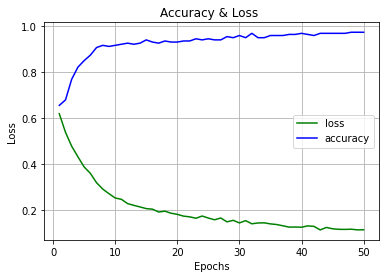

In [17]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
accuracy_values = history_dict['accuracy']
epochs = range(1, len(history_dict['accuracy']) + 1)
plt.plot(epochs, loss_values, 'g', label='loss')
plt.plot(epochs, accuracy_values, 'b', label='accuracy')
plt.title('Accuracy & Loss ')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [18]:
network.evaluate(X_test,y_test)

5/5 [==============================] - 0s 2ms/step - loss: 0.0736 - accuracy: 0.9786


[0.0735606700181961, 0.9785714149475098]

In [19]:
pred=network.predict(X_test)
pred.flatten().astype("U8")

array(['0.006134', '0.997813', '7.337312', '0.999827', '0.967316',
       '0.998966', '0.999707', '0.929883', '0.002836', '0.048298',
       '0.997875', '0.998712', '0.005574', '0.992416', '9.477932',
       '0.003269', '0.669687', '0.009234', '0.984947', '0.000110',
       '0.643602', '0.973259', '0.994578', '0.855619', '9.120422',
       '0.999936', '0.988991', '0.997557', '0.881278', '0.997723',
       '0.011010', '0.998406', '0.003316', '0.331792', '0.997800',
       '0.999599', '0.026715', '1.141747', '0.999078', '0.999611',
       '0.967981', '0.995461', '0.987650', '0.993407', '0.998896',
       '0.942289', '0.997229', '0.996347', '0.076309', '0.998890',
       '0.971041', '0.999961', '0.082790', '0.005080', '0.999911',
       '0.992527', '0.002052', '5.198130', '0.000467', '0.998020',
       '0.992388', '0.003146', '0.998831', '0.014004', '0.000303',
       '0.999329', '8.103673', '0.999566', '0.996248', '2.664130',
       '0.996376', '0.011666', '7.643836', '0.997658', '0.0059